# **Data Preperation**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import os
import cv2

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout

2024-05-31 07:23:31.218683: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 07:23:31.218807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 07:23:31.343570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
images = []
labels = []
image_size = 150

class_names = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Train set
for i in class_names:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img_path = os.path.join(folderPath,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(image_size,image_size))
        images.append(img)
        labels.append(i)
        
# Test set         
for i in class_names:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img_path = os.path.join(folderPath,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(image_size,image_size))
        images.append(img)
        labels.append(i)
        
        
images = np.array(images)
labels = np.array(labels)

In [3]:
images , labels = shuffle(images , labels , random_state=42)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(images,labels,test_size=0.1,random_state=42)

In [5]:
print('shape of train images ' ,X_train.shape)
print('shape of train labels ' ,y_train.shape)
print('shape of test images ' ,X_test.shape)
print('shape of test labels ' ,y_test.shape)

shape of train images  (2937, 150, 150, 3)
shape of train labels  (2937,)
shape of test images  (327, 150, 150, 3)
shape of test labels  (327,)


# **Visualizations**

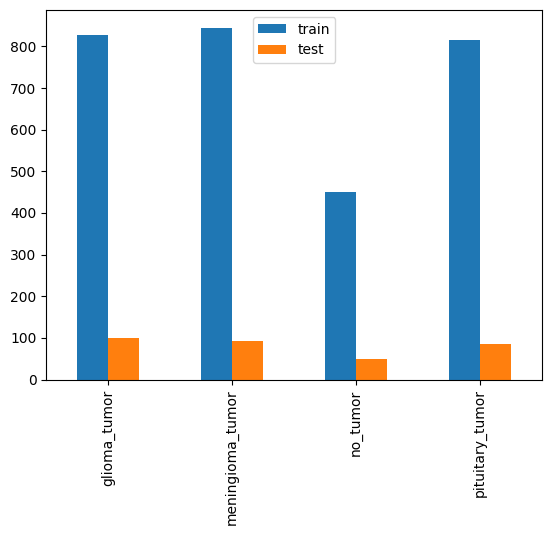

In [6]:
# checking the balance of data

_,train_counts = np.unique(y_train, return_counts=True)
_,test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

label is : 0


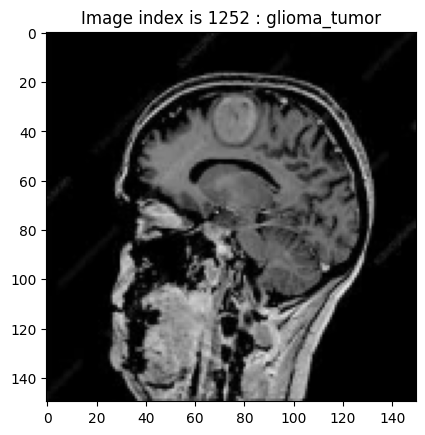

In [7]:
i = np.random.randint(X_train.shape[0])
plt.imshow(X_train[i])
plt.title('Image index is {} : '.format(i) + y_train[i])
print('label is :',class_names.index(y_train[i]))

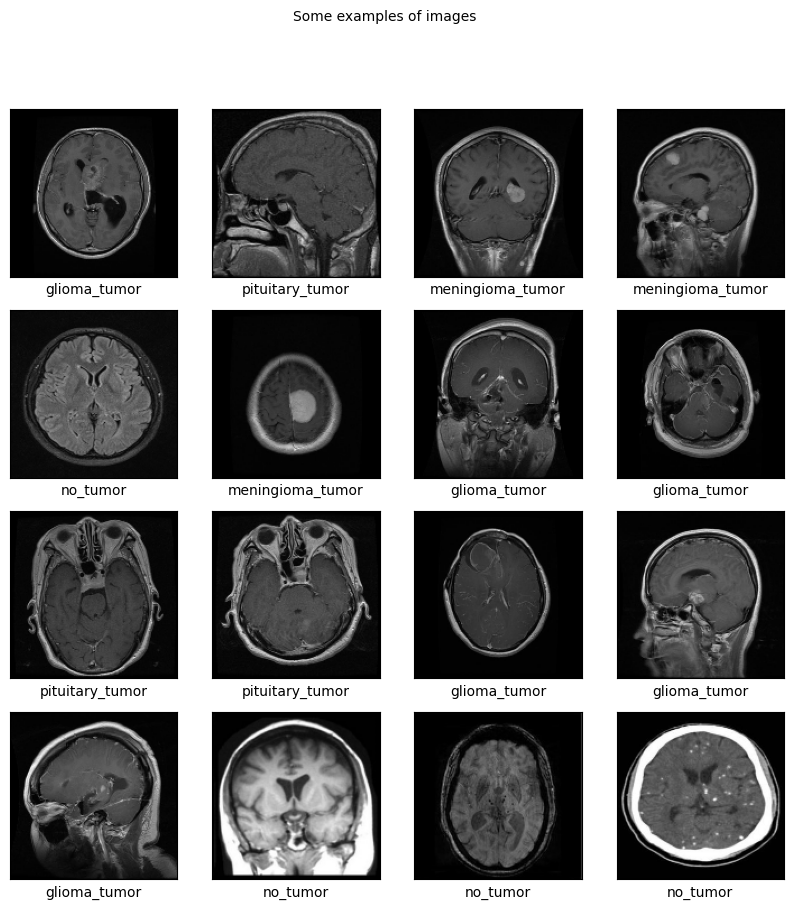

In [8]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images", fontsize=10)
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i],cmap=plt.cm.binary)
        plt.xlabel(y_train[i])
plt.show()

# **Transfer Learning Model**

In [9]:
# One-Hot Encoding Labels

y_train_new = []
for i in y_train:
    y_train_new.append(class_names.index(i))
    
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(class_names.index(i))
    
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
Resnet_50 = tf.keras.applications.ResNet50(include_top=False, input_shape=(150,150,3), weights='imagenet')

for layer in Resnet_50.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
model = Sequential([
    
        Resnet_50,
        keras.layers.Flatten(),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4,activation='softmax'),

])

In [12]:
model.compile(optimizer='Adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split = 0.2)

Epoch 1/30
 5/74 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3626 - loss: 13.8984

I0000 00:00:1717140278.759481      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 238ms/step - accuracy: 0.5262 - loss: 11.1972 - val_accuracy: 0.7959 - val_loss: 0.5885
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7690 - loss: 0.5853 - val_accuracy: 0.8265 - val_loss: 0.4697
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7948 - loss: 0.5763 - val_accuracy: 0.8486 - val_loss: 0.4469
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8308 - loss: 0.4569 - val_accuracy: 0.8554 - val_loss: 0.3794
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8673 - loss: 0.3440 - val_accuracy: 0.8673 - val_loss: 0.3750
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8751 - loss: 0.3701 - val_accuracy: 0.8776 - val_loss: 0.3946
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8738 - loss: 0.2971 - val_accuracy: 0.8827 - val_loss: 0.3506
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8959 - loss: 0.2571 - val_accuracy: 0.8878 - val_loss:

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,913,166 (239.99 MB)

 Trainable params: 13,108,484 (50.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 26,216,970 (100.01 MB)

# **Evaluation**


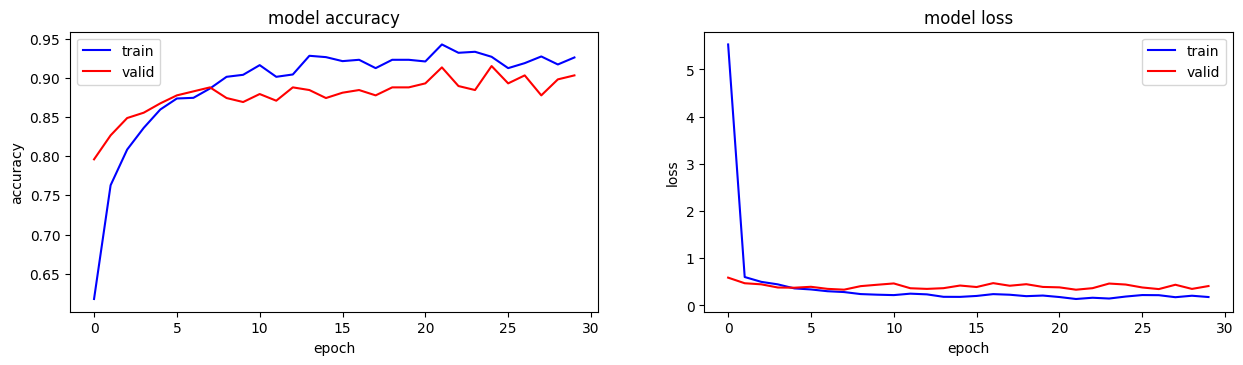

In [15]:
plt.figure(1, figsize = (15,8))    
plt.subplot(221)  
plt.plot(history.history['accuracy'],'b')  
plt.plot(history.history['val_accuracy'],'r')  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'],'b')  
plt.plot(history.history['val_loss'],'r')  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [16]:
#Predicting the test data
test_data = model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - accuracy: 0.9012 - loss: 0.4048


In [17]:
test_prediction = model.predict(X_test)       

predicted_labels = np.argmax(test_prediction, axis=1)

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

print(classification_report(y_test_new,predicted_labels,target_names=labels))

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.99      0.85      0.91       100
meningioma_tumor       0.79      0.90      0.84        92
        no_tumor       0.98      0.98      0.98        49
 pituitary_tumor       0.92      0.93      0.92        86

        accuracy                           0.91       327
       macro avg       0.92      0.92      0.92       327
    weighted avg       0.91      0.91      0.91       327



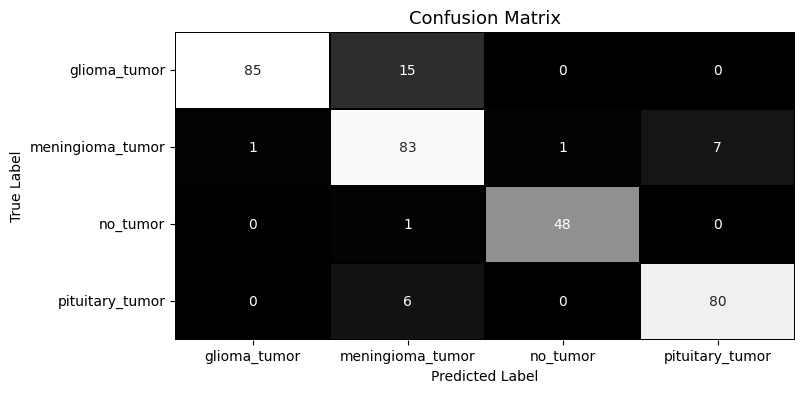

In [18]:
confusion_mtx = confusion_matrix(y_test_new,predicted_labels) 

f,ax = plt.subplots(figsize = (8,4),dpi=100)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1,
            cmap = "gist_yarg_r", linecolor="black",
            fmt='.0f', ax=ax,cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

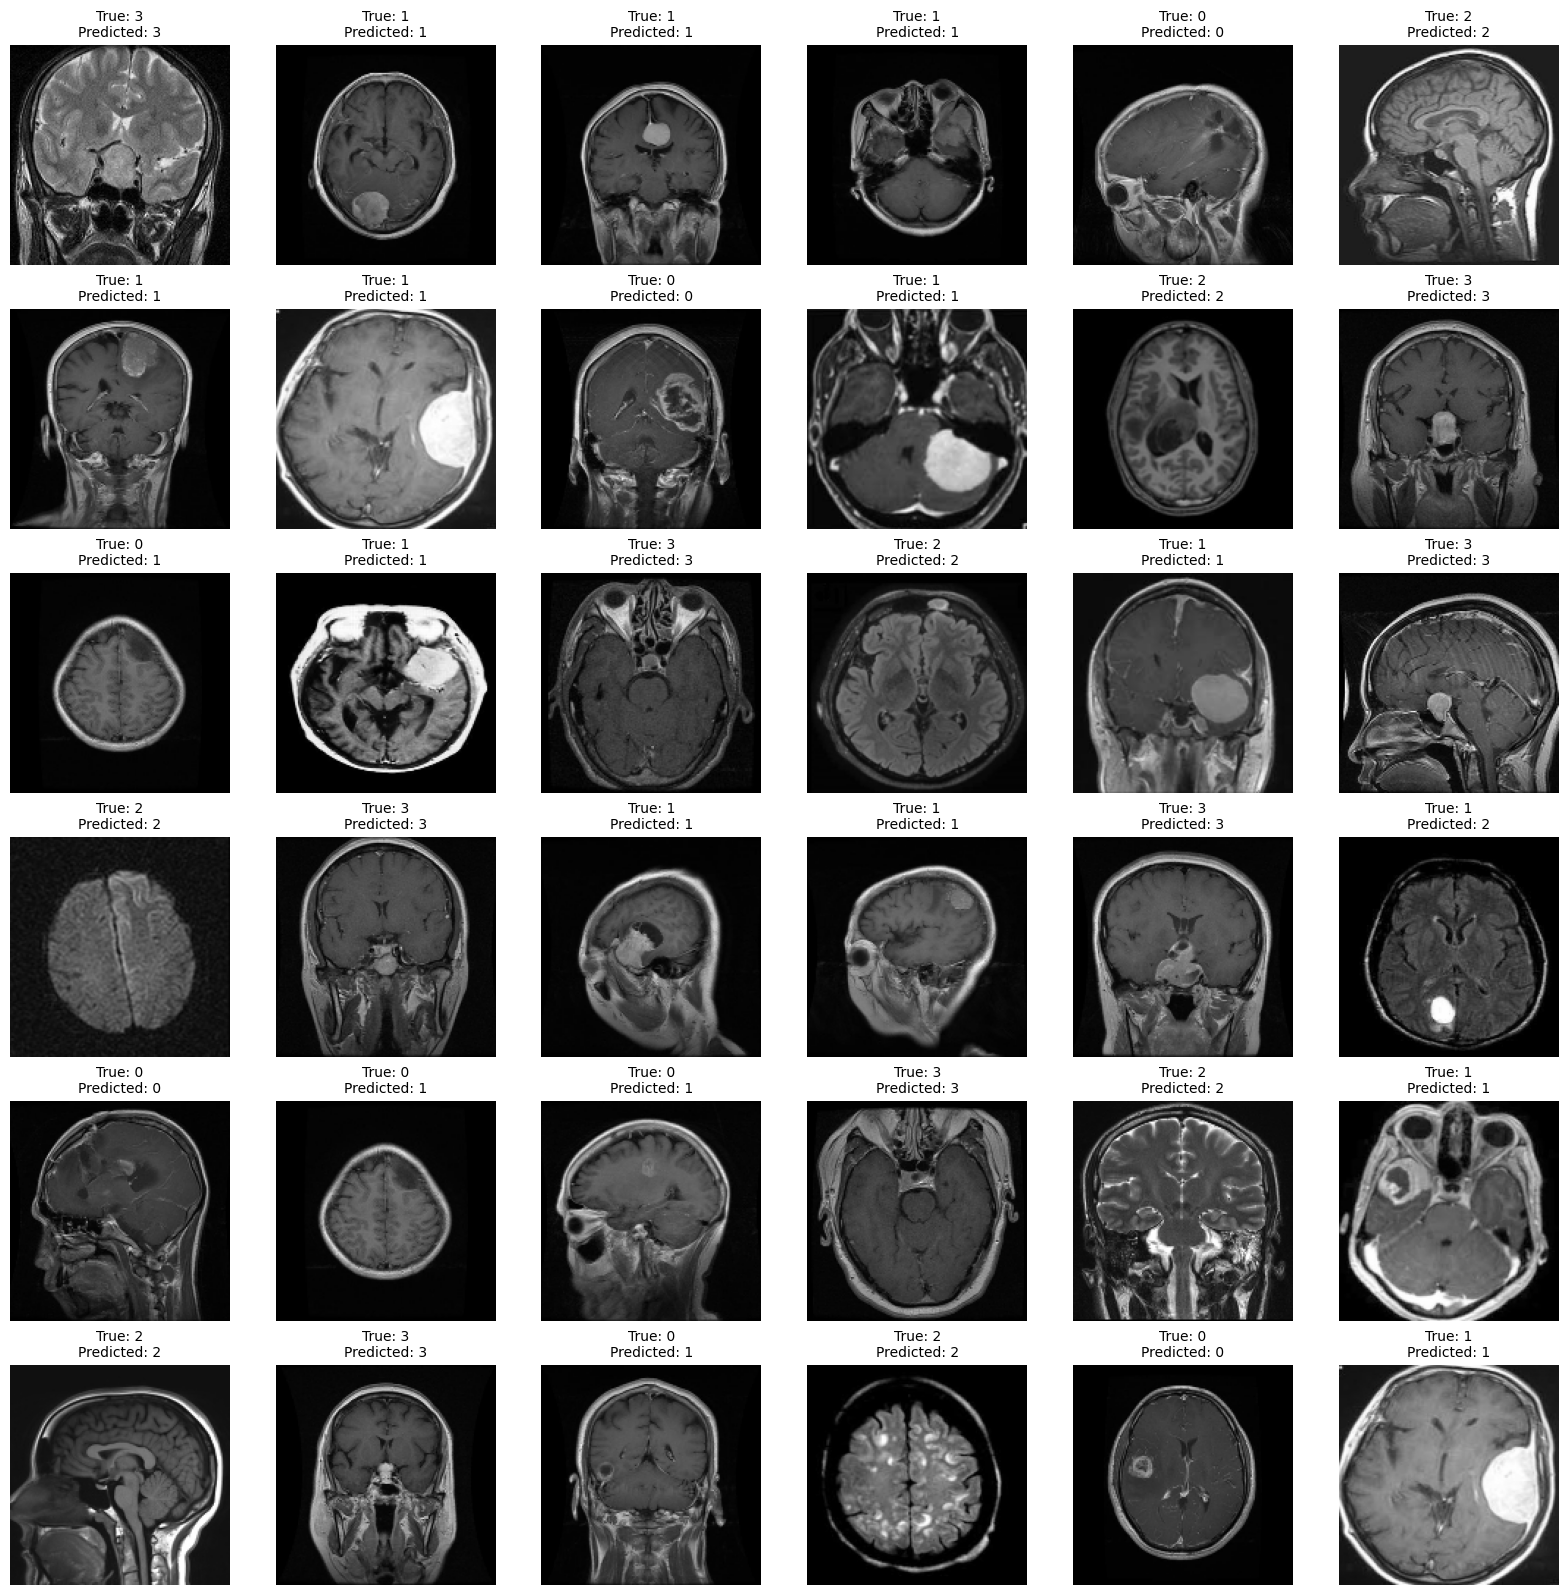

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(f'True: {y_test_new[i]}\nPredicted: {predicted_labels[i]}', fontsize=10)